# Learning Through Dialogue Interaction By Asking Question 

* ICLR 2017
* Jiwei Li, Jason Weston el at.
* Facebook AI Research

In [1]:
from IPython.display import Image

# 1. Introduction 

학생들은 대답에 자신이 없을 때, 선생님께 힌트를 얻기 위한 질문을 던진다. 좋은 conversational agent(a learner/bot/student)는 이러한 상호작용 능력을 필요로 한다. 하지만 최근 연구들은 단지 고정된 답변을 학습하도록 하고 있다. 인간은 구문/구조의 어색함이나 모르는 단어, 명확한 답을 몰라도 그 상황에 잘 적응하여 대답할 수 있다. 그렇기 때문에 이러한 상호작용 능력이 대화를 학습하는데 꼭 필요하다.

## 3 main mistakes 

1. the learner has problems understanding the surface form of the text of the dialogue partner(the phrasing of a question)
2. the learner has a problem with reasoning(fail to retrieve and connect the relevand knowledge to the question at hand)
3. the leaner lacks the knowledge necessary to answer the question in the first place(the knowledge sources the student has access to do not contain the needed information)

위의 실수들은 파트너와 interaction하며 해결될 수 있다. 즉 미래 대화에서 더욱 좋은 성능을 내도록 학습한다. <br><br>
1> 만약 선생님의 질문이 명확하지 않다면 다시 질문하여 질문을 명확하게 한다. <br>
2> 만약 어디서부터 시작해야 하는지 모르겠다면 어떤 facts가 가장 관련 있는지 물어볼 수 있다. <br>
3> 만약 대답에 필요한 정보를 아예 모르겠다면, 그들이 놓치고 있는 knowledge를 요청하여 미래에 사용할 수 있다.

<br>That is,
<strong>learn how to learn</strong>

We hence design a simulator and a set of synthetic tasks in the movie question answering domain that allow a bot to interact with a teacher to address the issues described above. Using this framework, we explore <strong>how a bot can benefit from interaction by asking questions in both offline supervised settings and online reinforcement learning settings</strong>, as well as <strong>how to choose when to ask questions in the latter setting.</strong>

In both cases, we find that the learning system improves through interacting with users. Finally, we validate our approach on real data where the teachers are humans using Amazon Mecahnical Turk, and observe similar results.

# 2. Related work

### Learning language through interation and feedback 

* Wittgenstein argued that the meaning of words is best understood from their use within given language games(Wittegenstein, 2010)
* Interactive language learning through language games (Winograd, 1972), SHRDLURN system (Wang et al., 2016)
* Second language learning(Bassiri, 2011) ..

###  Deep learning dialogue models

* Chit-chat type end-to-end dialogue systems(Vinyals & Le, 2015; Li et al.,2015; Sordoni et al., 2015)
* Goal-oriented dialogue systems (Wen et al., 2016; Su et al., 2016; Bordes & Weston, 2016)
* Supervised learning for question answering from dialogues(Dodge et al., 2015; Weston, 2016), using either a given database of knowledge( Bordes et al., 2015; Miller et al., 2016) or short stories(Weston et al., 2015)

<br>
<strong>하지만 이러한 모델들은 fixed supervised signals를 학습할뿐, user와 interaction하며 배우지는 못한다.<strong>

### 아래 개념을 생각해보겠다

* Imitation Learning : the agent tries to learn by imitating the dialogue interactions between a teacher and an expert student
* Reward-Based Imitation Learning : only learns by imitating the dialogue interactions which have correct answers
* Forward Prediction : learns by predicting the teacher's feedback to the student's respond

# 3. The tasks 

https://github.com/facebook/MemNN/tree/master/AskingQuestions

## 3 different situations 

1. Question Clarification : 질문을 명확히 물어보기
2. Knowledge Operation : knowledge base에서 관련 있는 fact를 고르는 것을 물어보기
3. Knowledge Acquisition : 아예 knowledge base가 불완전할 때 물어보기

### WikiMovies dataset 

100k questions over 75k entities based on questions with answers in the open movie dataset(OMDb). <br>
Training/Dev/Test sets : 181638/9702/9698

Accuracy metric corresponds to the percentage of times the sudent gives correct answers to the teacher's questions.

### Process

1. bot은 먼저 OMBb KB로부터 facts들을 습득하고 이를 knowledge base로 활용한다.(MemNN)
2. 그런 다음 bot이 답해야 하는 질문과 관련 없는 question-answer pairs를 더 추가한다. (Conversation histories) <관련 메모리에 대한 집중도를 일부러 떨어뜨린다.>
3. 각 3개의 시나리오에 따라, simulator는 두가지 셋팅에 의해 geneate한다. QA(Question-Answering), AQ(Asking-Question). 이 2가지 셋팅 모두 결국엔 teacher의 질문에 답해야 한다.

## 3.1 Question Clarification 

이 셋팅에서, 봇은 teacher의 질문을 명확히 이해하지 못한다. 우리는 teacher가 typo/spelling 실수를 했을 때 bot이 이해하지 못하는 상황에 집중한다. 일부러 movie -> movvie, star -> sttar과 같은 spelling 실수를 하여 질문한다. (봇은 스펠이 틀린 단어를 전에 본적 없다는 것을 확실히 한다. train에서 일부러 틀린 단어는 dev/test 셋에서는 또 등장하지 않고 다른 단어를 틀리게 하여 질문한다.)

1. Question Paraphrase : the student asks the teacher to use a paraphrase that does not contain spelling mistakes to clarify the question by asking "what do you mean?" 
2. Question Verification : the student asks the teacher whether the original typ-bearing question corredsponds to another question without the spelling mistakes.(e.g., "Do you mean which film did Tom Hanks appear in?")

<br>
선생님은 학생의 답이 맞았는지에 따라 긍정/부정의 피드백을 준다. 

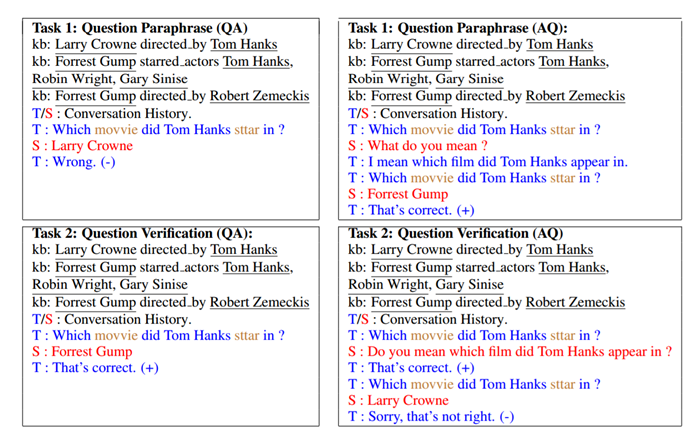

In [3]:
Image("image/ltdi1.png")

## 3.2 Knowledge Operation 

이 셋팅에서, 봇은 질문에 관련 있는 knowledge(facts)에 접근할 수 잇지만, 그 중에 어떤 것이 가장 필수적인지 추론하지는 못한다. bot이 관련 있는 facts를 이해하려 노력하는 special case에 집중한다.

1. Ask For Relevand Knowledge : the bot directly asks the teacher to point out the relevant KB fact
2. Knowledge Verification : the bot asks whether the teacher's question is relevant to one particular KB fact

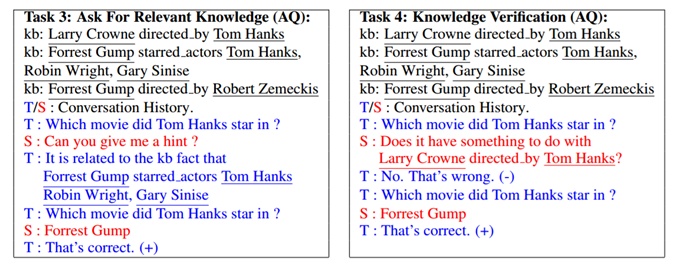

In [4]:
Image("image/ltdi2.png")

## 3.3 Knowledge Acquisition 

이 세션에서는 봇은 불완전한 KB를 가지는데 대화에서 중요한 entities들이 생략된다.

1. Misssing Question Entity : missing the entity that the teacher is asking about
2. Missing Answer Entity : The answer entity to the question is unknown to the bot. (e.g., Forrest Gump)
3. Missing Relation Entity : The relation type is unknown to the bot. (e.g., starred_actors) 
4. Missing Triples : The triple that expresses the relation between the question entity and the answer entity hidden from the bot.
5. Missing Everything : The question entity, the relation entity, the answer entity are all missing from the KB.
<br><br>
이 모든 경우에서, 불완전한 KB 탓에 제대로 된 답을 하기가 쉽지 않다. 따라서 선생님에게 missing knowledge를 매우기 위한 질문을 해야만 한다. 선생님은 답을 주고 관련없는 대화를 한 뒤(Conversation History), 다시 질문을 던진다. 

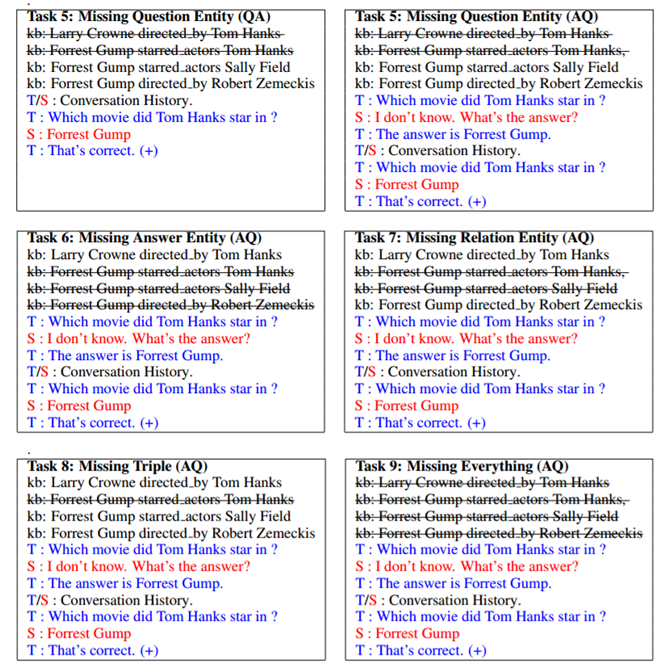

In [5]:
Image("image/ltdi3.png")

# 4. Train/Test Regime

## 4.1 Simulator 

<strong>2가지 목표</strong>

1. Section 3에서 다뤘던 3가지 시나리오에 대한 유효함 검증 (SL)
2. <strong>언제</strong> 질문해야 하는지 배우기 (RL)

<br>
이를 위해, Offline Supervised Learning, Online Reinforcement Learning 2가지 방법을 사용한다.

## 4.1.1 Offline Supervised Learning 

3가지 상황에 bot이 제대로 된 능력을 가질 수 있는지 검증하기 위해, 선생님의 질문에 대한 답으로 bot simulator는 50퍼센트는 맞는 답을, 50퍼센트는 틀린 답을 하도록 한다. (고정된 policy) 위에서 소개한 9가지 다른 시나리오를 포함하도록 training/test set 구성했다. <strong>TrainQA, TrainAQ, and TrainMix</strong>. 또한 <strong>TestQA, TestAQ, TestModelAQ </strong>을 이용하여 검증하는데, TestModelAQ의 경우 질문하는 방식이 고정되지 않고 여러가지가 될 수 있다? Train/Test의 조합은 현실 세계를 반영한다. 예를 들어, TrainAQ+TestQA는 평소 때 학생이 선생님께 질문을 던지며 답을 얻을 수 있지만, 시험보는 동안에는 오직 자력으로 문제를 해결해야 하는 것으로 볼 수 있다. 

## 4.1.2 Online Reinforcement Learning

학생들이 언제 질문해야하는지 결정하는 능력을 배우도록 한다. 즉, <strong> learns how to learn </strong>

물론 매 스텝마다 질문하도록 하는 방법도 있지만, 이 질문들에 대한 답은 추가적인 필요없는 정보들도 가지고 있기 때문에 이러한 행동을 배우는 것을 원치 않는다. 인간의 경우, 매번 짐룬을 할 때마다 이 행동(질문)에 연관된 비용이 있다. 이러한 비용은 선생님의 인냄심 혹은 좀더 제네럴하게 봇과 상호작용 하는 유저들의 인내심이다. 유저는 봇이 매번 질문을 되물어가며 명확히 하려 한다면 인내력이 떨어진다..! <br>
<strong>따라서 봇은 무엇을 언제 질문할지 신중하게 결정해야 한다.</strong>

### $P_{RLQuestion}$ 

불완전한 KB와 question이 주어진다. 그리고 지금 step에 질문할 것인지 안할 것인지 결정한다. 이러한 결정은 binary policy인 $P_{RLQuestion}$에 의해 결정난다. 만약 질문하도록 결정했다면, $cost_{AQ}$에 의해 페널티를 받는다. 이러한 $cost_{AQ}$는 0~2의 범위를 가지는데, 선생님(유저)의 인내력을 모델링한 것이다. 

### $P_{RLAnswer}$

학생(봇)은 결국은 $P_{RLAnswer}$를 이용해 선생님의 질문에 답한다.(질문을 했던 말던). 그리고 그 최종 대답이 맞았으면 1의 보상을, 틀렸다면 -1의 보상을 받는다. 

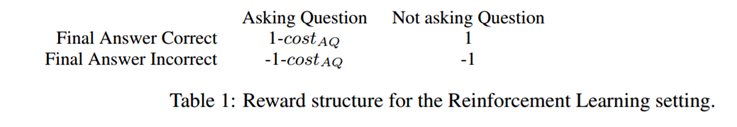

In [2]:
Image("image/ltdi4.png")

##  3 dirrerent RL scenarios

* Good-Student : 학생은 모든 관련있는 KB를 기억한다. 선생님의 질문에는 오탈자나 모르는 단어가 없다. (e.g., a large knowledge base, large vocabulary). 
* Poor-Student : 각 테스크마다 KB에 결함이 존재한다. 
* Medium-Student : 앞선 두 셋팅을 50퍼센트 씩 섞어서 질문한다. 

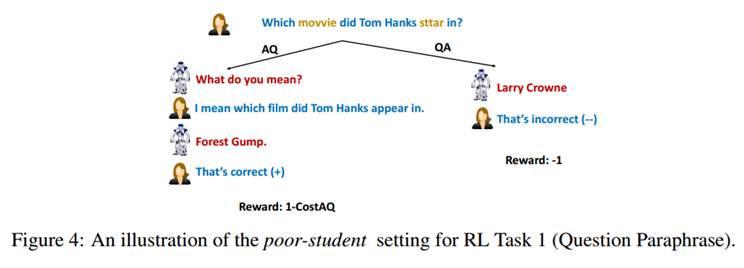

In [3]:
Image("image/ltdi5.png")

## 4.2 Mechanical Turk Data 

최종적으로 simulator를 넘어 현실세계에서 검증한다. <strong>Amazon Mechanical Turk</strong>으로부터 데이터를 수집했다. <br>
* http://hellodd.com/?md=news&mt=view&pid=60544 <br><br>
비용 때문에 특히 Task 4(Knowledge Verification)과 Task 8(Missing Triple)에 집중했다. (Train/Dev/Test 각각 10000/1000/2500) task의 틀을 따르되 인간의 realistic한 language를 사용할 것을 요구. 즉, 봇은 더이상 simulator의 일정 포맷을 가진 템플릿에 답하는 것이 아니라 진짜 인간의 물음에 답해야 하는 것이다. 인간의 답변 역시 simulator보다 훨씬 풍부하고 복잡하다.

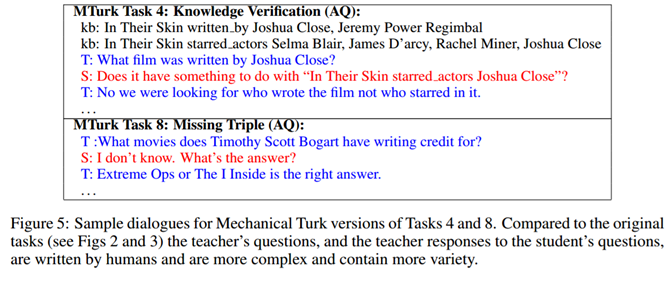

In [4]:
Image("image/ltdi6.png")

# 5. Models 

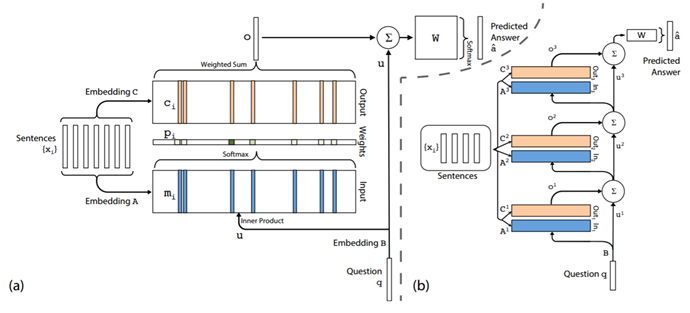

In [5]:
Image("image/mn7.png")

SL과 RL 셋팅 둘다, 가장 기본적으로 <strong>End-to-End Memory Network(MemN2N)</strong>을 사용했다. 

모델의 인풋으로 메모리에 저장 될 KB $(x_1,x_2,...,x_i)$와 dialogue history의 마지막 발언 $q$(query)가 들어간다. 모델은 이러한 인풋이 주어졌을 때, output/label $a$를 만들어내는 것이 목적이다. 

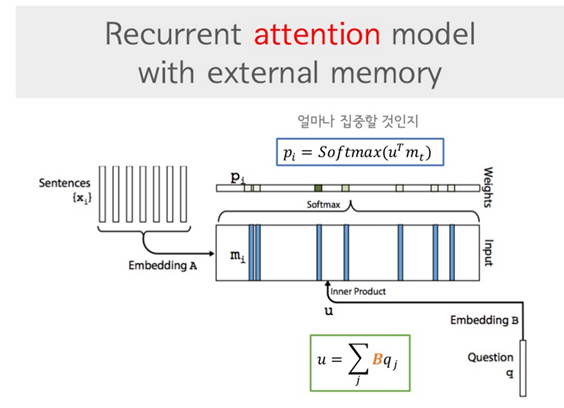

In [6]:
Image("image/ltdi7.png")

먼저, query $q$는 vector representation인 $u_0$로 변환된다. (by summing up its constituent word embeddings: $u_0 = Bq$ ($q$는 back-of-words, $B$는 $d$x$V$ word embedding matrix. $d$는 vector 차원, $V$는 vocab size) <br>
각 메모리 $x_i$도 이와 유사하게 vector $m_i$로 변환한다. $m_i = Ax_i$. 모델은 질문과 메모리의 연관성을 softmax 연산을 통해 weights를 준다.

<br><br>
$$ o = \sum_i p_ic_i$$  $$p_i = softmax(u_o^Tm_i)$$

결국 모델은 query $x$와 가장 연관 있는 memories를 선택하는 것을 목적으로 가지게 된다. queried memory vector $o_1$는 memory vectors의 weighted sum이 된다. 또한 그 원래 질문인 $u^0$에 $o^1$이 더해져 그 다음 레이어의 input으로 사용된다. <br>
$$u^{k+1} = u^k + o^k$$

최종적으로 $ a = softmax(W(o+u))$ 를 답변으로 generation

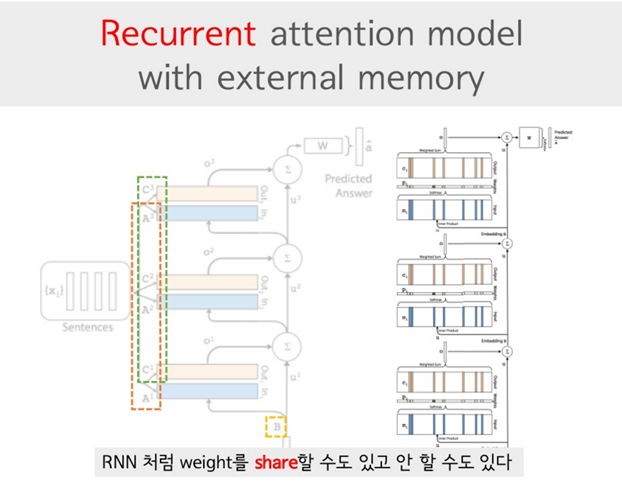

In [8]:
Image("image/ltdi9.png")

## vanilla-MemN2N

reward-based imitation strategy를 사용한다. 트레이닝할 때 모델은 학생이 올바른 대답을 하도록 log likelihood를 최대화시키는 방향으로 훈련한다. (최종적으로 잘못된 답을 한 예는 버린다?) 후보 답변은 메모리에 존재하는 단어이다. (즉, 봇은 오직 한번 봤던 entities에 대해서만 예측할 수 있다.)

## context-MemN2N 

각 단어의 임베딩을 그것을 평균 임베딩(random for unseen words) 혹은 그 주변 단어의 임베딩으로 대체한다. (따라서 context window size 역시 hyperparameter로 정해준다.) 

## MemN2N + Forward Prediction  (SL) 

위 2가지 모델 모두, 봇의 대답만 signal로 사용하고 선생님의 피드백은 무시할 수도 있다는 이슈가 있다. 그러므로 모델이 bot's answer와 teacher's feedback (denoted as TrainQA + FP)를 jointly predict하도록 한다. 봇의 대답은 <strong>MemN2N</strong>을 이용하여 예측하고 선생님의 피드백은 <strong>Forward Prediction(FP)</strong>을 이용하여 예측한다. FP의 디테일은 Appendix에..<br><br>
트레이닝하는 동안 모델은 teacher's feedback과 answers with positive reward를 동시에 예측하고, 테스트하는 동안에는 오직 bot's answer만 예측한다.

## Online RL 

1. binary vanilla-MemN2N (denoted as $P_RLQuestion$)이 질문을 할지 말지 정하는 모델로 사용된다. (teacher의 답변과 함께)
2. 두번째 MemN2N(denoted as $P_RLAnswer$)은 bot의 답변을 결정한다. 이 $P_RLAnswer$은 QA인지 AQ인지에 따라 각각 다르게 적용된다.(추가 질문하지 않고도 답하는 QA의 모델과 추가 질문이 요구되는 AQ가 다른 모델이라는 뜻)

각 다이얼로그마다, 봇은 두가지 연속적인 액션을 취한다. ($a_1,a_2$), $a_1$은 질문을 할지말지에 대한 binary action, $a_2$는 최종 답을 예측하는 action. $r(a_1,a_2)$를 다이얼로그 에피소드의 누적 보상. $b$는 또다른 MemN2N model로 future reward를 추정한 값이다.( 이 baseline model은 estimated reward $b$와 cumulative reward $r$일 때, $||r-b||^2$ 를 최소화 하도록 훈련시킨다.) 그렇기 때문에 baseline estimator model은 policy models과 독립적이고 backprop도 적용하지 않는다. 

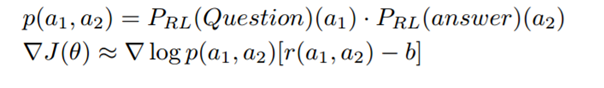

In [9]:
Image("image/ltdi10.png")

실제로는 먼저 $P_{RLAnswer}$만을 충분히 훈련시킨 뒤, 후에 두 모델을 병렬적으로 업데이트한 것이 결과가 좋았다고 한다. 

# 6. Experiments 

## 6.1 Simulator 

## Offline Setting(SL) 

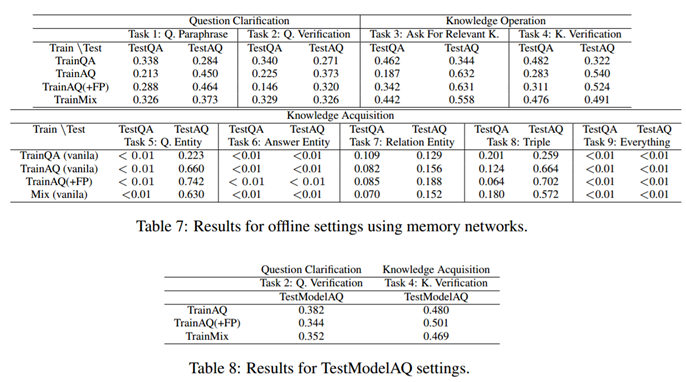

In [11]:
Image("image/ltdi12.png")

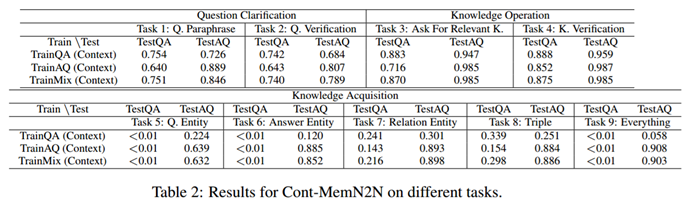

In [10]:
Image("image/ltdi11.png")

* TrainAQ+TestAQ (questions can be asked at both training and test time) performs the best across all the settings.
* TrainQA+TestAQ (questions can be asked at training time but not at test time) performs worse than TrainQA+TestQA (questions can be asked at neither training nor test time) in tasks Question Clarification and Knowledge Operation due to the discrepancy between training and testing.
* TrainQA+TestAQ performs better than TrainQA+TestQA on all Knowledge Acquisition tasks, the only exception being the Cont-MemN2N model on the Missing Triple setting. The explanation is that for most tasks in Knowledge Acquisition, the learner has no chance of giving the correct answer without asking questions. The benefit from asking is thus large enough to compensate for the negative effect introduced by data discrepancy between training and test time.
* TrainMix offers flexibility in bridging the gap between datasets generated using QA and AQ, very slightly underperforming TrainAQ+TestAQ, but gives competitive results on both TestQA and TestAQ in the Question Clarification and Knowledge Operations tasks.
* TrainAQ+TestQA (allowing questions at training time but forbid questions at test time) performs the worst, even worse than TrainQA+TestQA. This has a real-world analogy where a student becomes dependent on the teacher answering their questions, later struggling to answer the test questions without help.
* In the Missing Question Entity task (the student does not know about the question entity), the Missing Answer Entity task (the student does not know about the answer entity), and Missing Everything task, the bot achieves accuracy less than 0.01 if not asking questions at test time (i.e., TestQA).
* The performance of TestModelAQ, where the bot relies on its model to ask questions at test time (and thus can ask irrelevant questions) performs similarly to asking the correct question at test time (TestAQ) and better than not asking questions (TestQA).


## Online Setting(RL) 

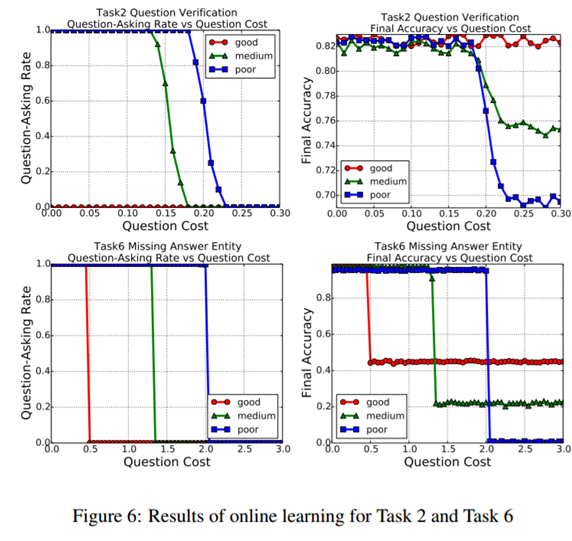

In [12]:
Image("image/ltdi13.png")

3 경우 모두 asking for the correct answer의 이득을 보고 있다.<br>
<br>

* A good student does not need to ask questions in Task 2(Question Verification), because they already understand the question. The student will raise questions asking for the correct answer when cost is low for Task 6 (Missing Answer Entities).
* A poor student always asks questions when the cost is low. As the cost increases, the frequency of question-asking declines.
* As the AQ cost increases gradually, good students will stop asking questions earlier than the medium and poor students. The explanation is intuitive: poor students benefit more from asking questions than good students, so they continue asking even with higher penalties.
* As the probability of question-asking declines, the accuracy for poor and medium students drops. Good students are more resilient to not asking questions.

## 6.2 Mechanical Turk 

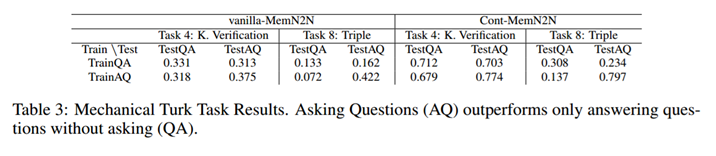

In [13]:
Image("image/ltdi14.png")

당연히 simulator보다 성능은 떨어지진다. 왜냐하면 real data는 훨씬 풍부하고 복잡하고 노이즈가 낀 어휘가 등장하고 training set 역시 훨씬 적기 때문이다. (10k vs 180k). 하지만 결론은 같게 내릴 수 있다. 